In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
df = pd.read_csv('kd_csv.csv')

In [4]:
# kd.head()

In [5]:
# kd.apply(kd.shift(-1), states)

In [6]:
def states(quarter, make, value, previous_quarter, previous_make, previous_value):
    if pd.isna(previous_make) or previous_quarter < quarter:
        return "START_TO_" + make + str(int(value))
    return previous_make + str(int(previous_value)) + "_TO_" + make + str(int(value))

In [7]:
previous = df[['QUARTER','MAKE_MISS', 'VALUE']].shift(1)
previous.columns = ['PREVIOUS_QUARTER','PREVIOUS_MAKE_MISS', 'PREVIOUS_VALUE']
df_with_previous = pd.concat([df, previous], axis=1)

In [8]:
df_with_states = df_with_previous.apply(lambda x: states(x.QUARTER, x.MAKE_MISS, x.VALUE, x.PREVIOUS_QUARTER, x.PREVIOUS_MAKE_MISS, x.PREVIOUS_VALUE), axis=1)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
ddf = pd.DataFrame(df_with_states)
ddf.columns = ['STATE']

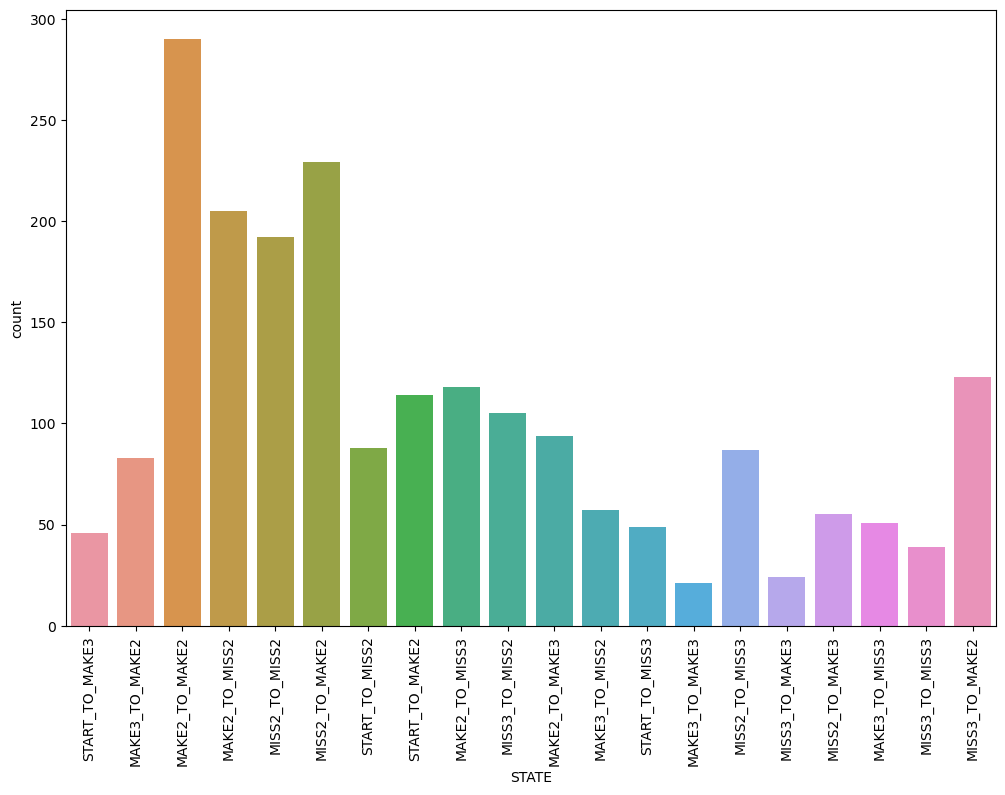

In [12]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.countplot(data=ddf, x='STATE')
plt.savefig('states.png')